In [1]:
# pip install G4X-helpers
import g4x_helpers as g4h
g4h.__version__

'0.0.2'

G4X_output @ /mnt/scratch/users/floraths/s3_data/caretta_staged_reads/g4-007/127/fc3/g4-007-127-FC3-L002_v2111/customer_output/D02
Sample: D02 of G07-127, FC3

Transcript panel with 362 genes	[ACKR1, ACKR4, ACTA2, ADGRE5, ADGRF5 ... ]
Protein panel with 20 proteins	[ATPase, CD11c, CD20, CD3, CD31 ... ]



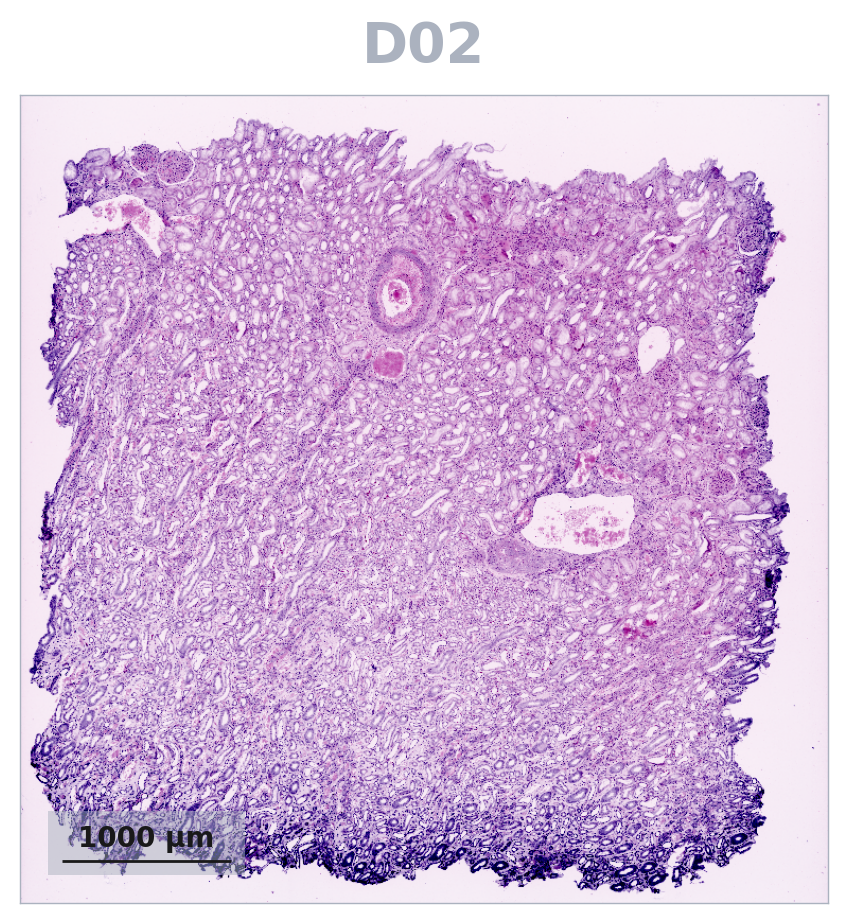

In [2]:
run_base = '/mnt/scratch/users/floraths/s3_data/caretta_staged_reads/g4-007/127/fc3/g4-007-127-FC3-L002_v2111/customer_output/D02'
sample = g4h.G4Xoutput(run_base=run_base)

print(sample)
sample.thumb(size=4.5, view='tissue', scale=1, show_tissue_bounds=True)

In [3]:
sample.list_contents(subdir='single_cell_data')

{'dirs': [],
 'files': ['cell_by_protein.csv.gz',
  'feature_matrix.h5',
  'dgex.csv.gz',
  'cell_metadata.csv.gz',
  'cell_by_transcript.csv.gz',
  'clustering_umap.csv.gz']}

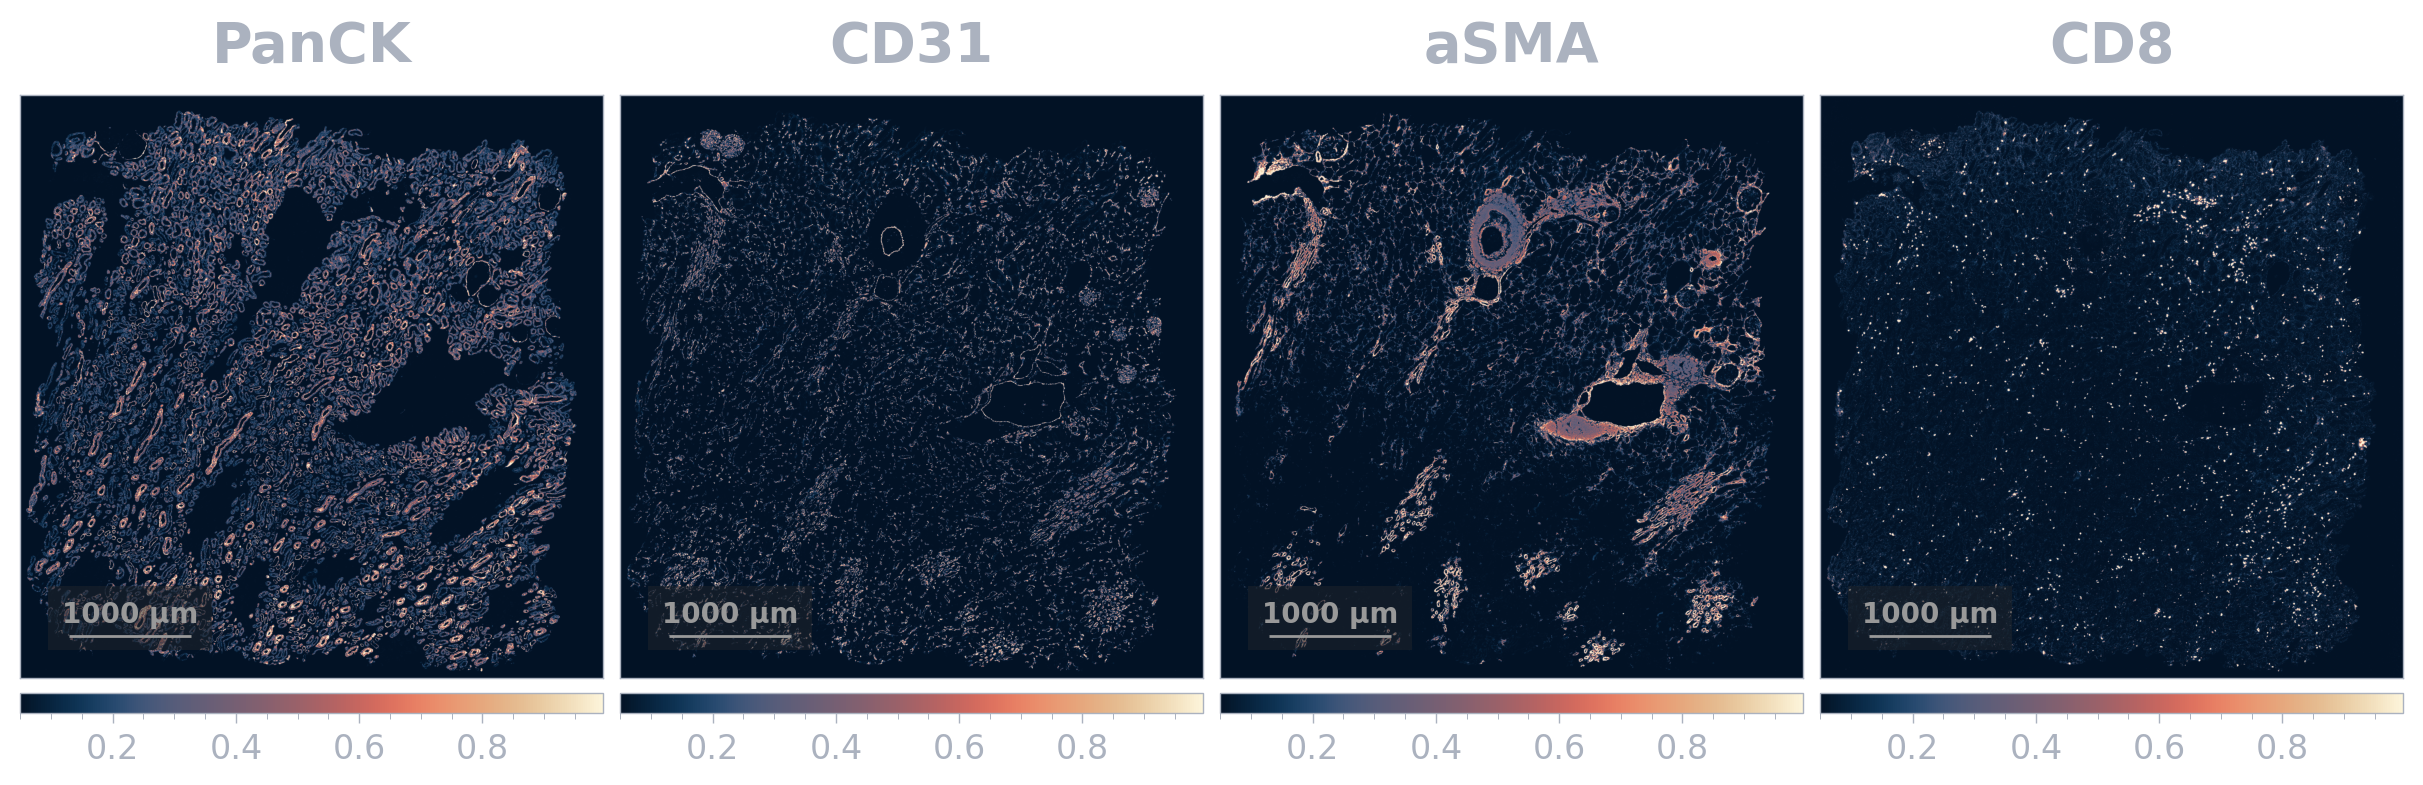

In [4]:
sample.plot_signals(signals=['PanCK', 'CD31', 'aSMA', 'CD8'], view='tissue', size=3, scale=1, thumbnail=True)

### New rois can be added and used for plotting

In [5]:
sample.add_roi(roi_name='test_roi', xlims=(2500, 7500), ylims=(2500, 7500))

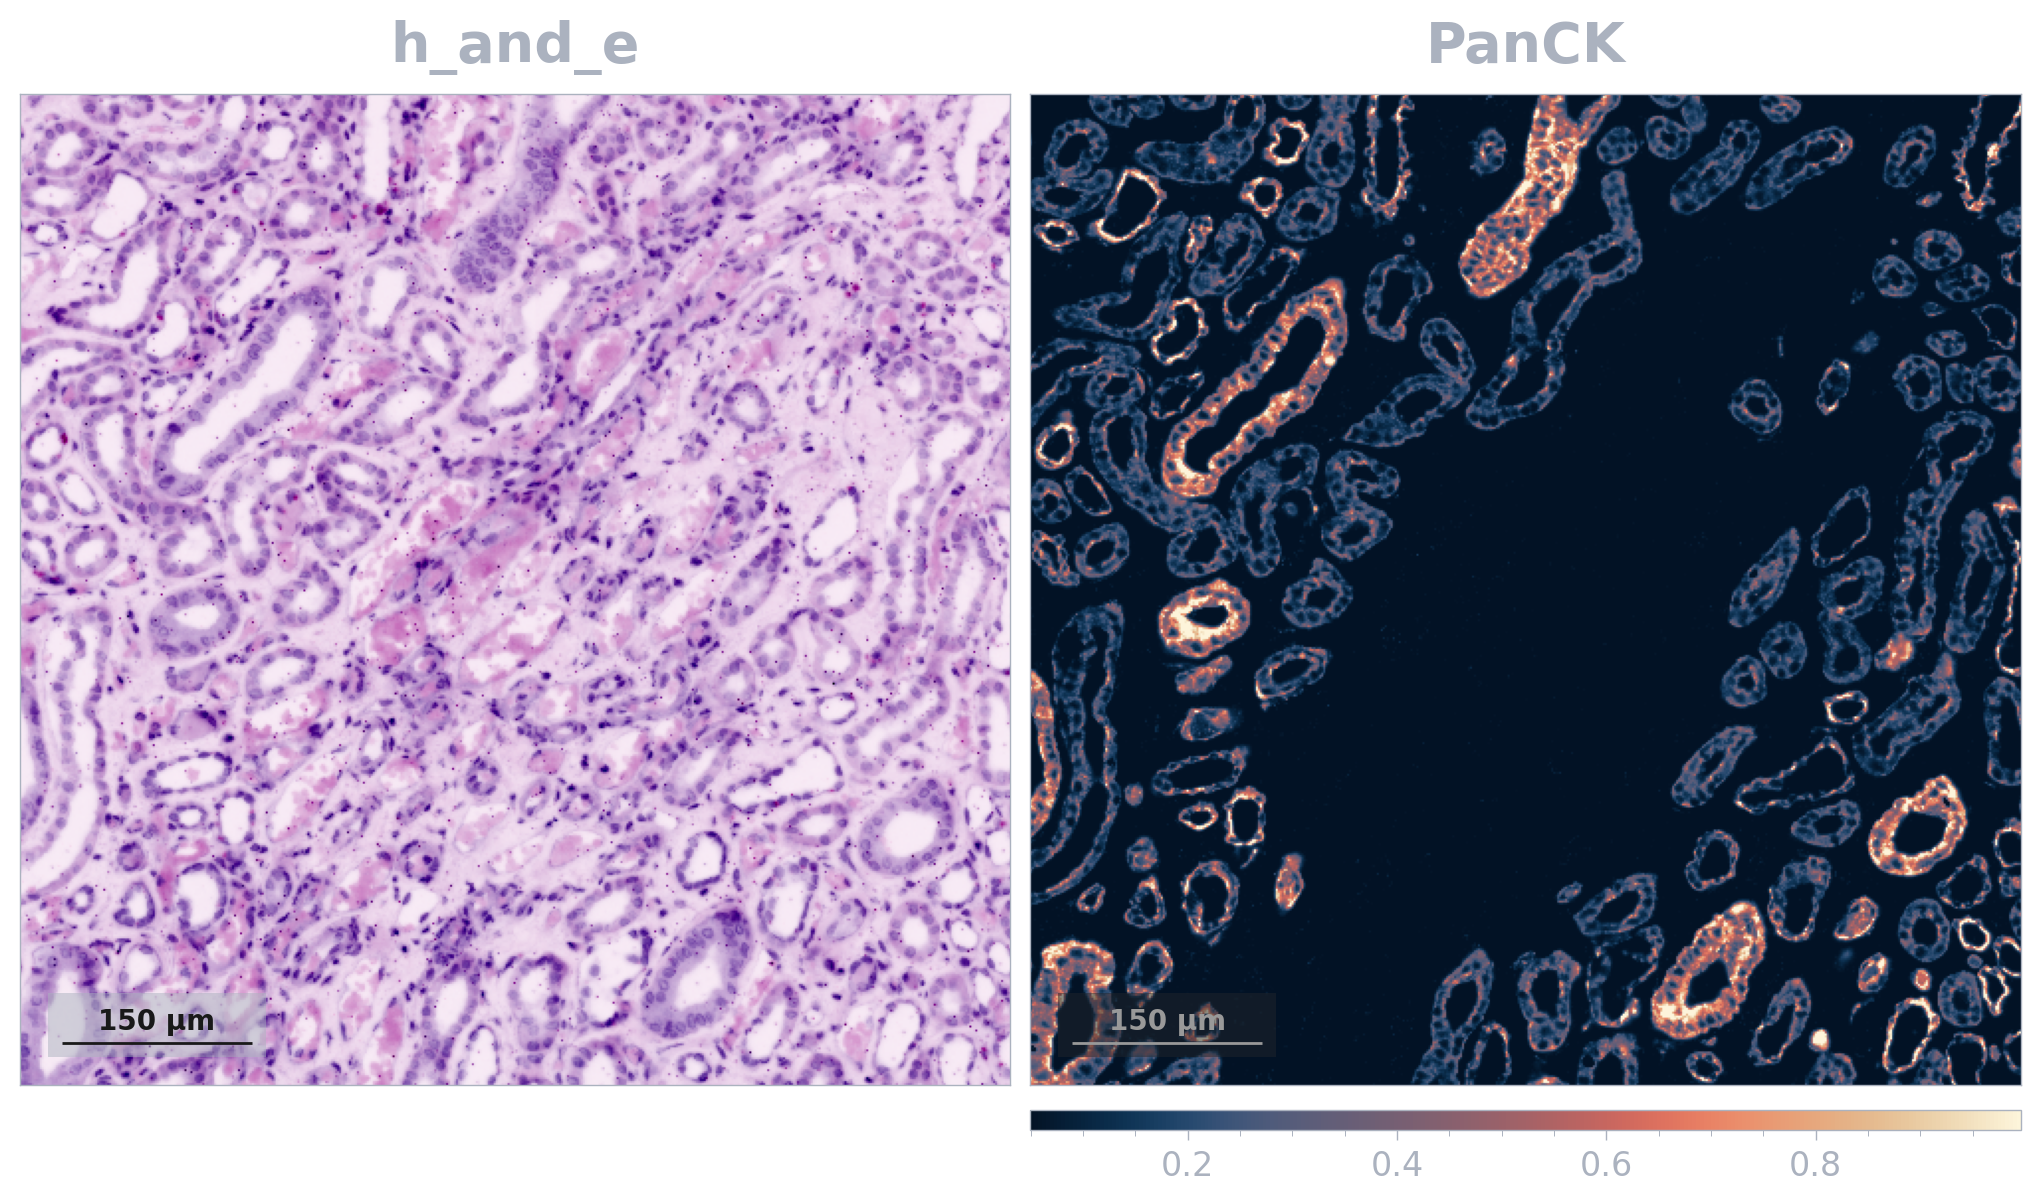

In [6]:
sample.plot_signals(signals=['h_and_e', 'PanCK'], view='test_roi', size=5, scale=0.5, thumbnail=True)

### images will be loaded from cache if they have been previously loaded/plotted

In [7]:
img = sample.load_image('h_and_e', thumbnail=True)['img']
img.shape

(3840, 3047, 3)

# Re-Segmentation
### vectorize the seg masks to simulate input from polygons

In [8]:
import g4x_helpers.segmentation as g4x_segmentation

test_mask = sample.load_segmentation(expanded=True)

polygon_labels = g4x_segmentation._vectorize_mask(test_mask, nudge=True)
polygon_labels.head()

label                                           geometry
0      1  POLYGON ((11282.5 37, 11281.5 37, 11280.5 37, ...
1      2  POLYGON ((77.5 42, 76.5 42, 75.5 42, 74.5 42, ...
2      3  POLYGON ((13034.5 78, 13033.5 78, 13032.5 78, ...
3      4  POLYGON ((12417.5 85, 12416.5 85, 12416 84.5, ...
4      5  POLYGON ((5776.5 96, 5775.5 96, 5774.5 96, 577...

In [13]:
seg_out = sample.run_base / 'custom_seg'
sample.run_g4x_segmentation(labels=polygon_labels, out_dir=seg_out, include_channels=['nuclear', 'eosin', 'PanCK', 'CD31'])

Rasterizing provided GeoDataFrame
Extracting mask properties
Assigning transcripts to mask labels
Extracting image signals
Extracting nuclear signal...
Extracting eosin signal...
Extracting PanCK signal...
Extracting CD31 signal...
Building output data structures


/home/singular/.pyenv/versions/g4x_helpers/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Saving output files to /mnt/scratch/users/floraths/s3_data/caretta_staged_reads/g4-007/127/fc3/g4-007-127-FC3-L002_v2111/customer_output/D02/custom_seg


In [14]:
sample.list_contents(seg_out / 'single_cell_data')

{'dirs': [], 'files': ['cell_metadata.csv.gz']}

In [17]:
import polars as pl
pl.read_csv(seg_out / 'single_cell_data' / 'cell_metadata.csv.gz').head()

shape: (5, 13)
┌─────┬─────────────┬────────┬─────────────┬───┬────────────┬────────────┬────────────┬────────────┐
│     ┆ segmentatio ┆ area   ┆ cell_x      ┆ … ┆ n_genes_by ┆ log1p_n_ge ┆ total_coun ┆ log1p_tota │
│ --- ┆ n_cell_id   ┆ ---    ┆ ---         ┆   ┆ _counts    ┆ nes_by_cou ┆ ts         ┆ l_counts   │
│ i64 ┆ ---         ┆ f64    ┆ f64         ┆   ┆ ---        ┆ nts        ┆ ---        ┆ ---        │
│     ┆ str         ┆        ┆             ┆   ┆ i64        ┆ ---        ┆ i64        ┆ f64        │
│     ┆             ┆        ┆             ┆   ┆            ┆ f64        ┆            ┆            │
╞═════╪═════════════╪════════╪═════════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0   ┆ D02-1       ┆ 1208.0 ┆ 11278.93874 ┆ … ┆ 0          ┆ 0.0        ┆ 0          ┆ 0.0        │
│     ┆             ┆        ┆ 2           ┆   ┆            ┆            ┆            ┆            │
│ 1   ┆ D02-2       ┆ 1735.0 ┆ 69.005764   ┆ … ┆ 0          ┆ 0.0        ┆ 0          ┆ 0.0        │
│ 2   ┆ D02-3       ┆ 2076.0 ┆ 13024.85693 ┆ … ┆ 2          ┆ 1.098612   ┆ 5          ┆ 1.791759   │
│     ┆             ┆        ┆ 6           ┆   ┆            ┆            ┆            ┆            │
│ 3   ┆ D02-4       ┆ 1787.0 ┆ 12414.14661 ┆ … ┆ 2          ┆ 1.098612   ┆ 9          ┆ 2.302585   │
│     ┆             ┆        ┆ 4           ┆   ┆            ┆            ┆            ┆            │
│ 4   ┆ D02-5       ┆ 2250.0 ┆ 5767.357778 ┆ … ┆ 4          ┆ 1.609438   ┆ 13         ┆ 2.639057   │
└─────┴─────────────┴────────┴─────────────┴───┴────────────┴────────────┴────────────┴────────────┘

In [18]:
import polars as pl
pl.read_csv(sample.run_base / 'single_cell_data' / 'cell_metadata.csv.gz').head()

shape: (5, 33)
┌───────┬────────────┬───────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ label ┆ nuclei_are ┆ cell_y    ┆ cell_x     ┆ … ┆ n_genes_by ┆ log1p_n_g ┆ total_cou ┆ log1p_tot │
│ ---   ┆ a          ┆ ---       ┆ ---        ┆   ┆ _counts    ┆ enes_by_c ┆ nts       ┆ al_counts │
│ str   ┆ ---        ┆ f64       ┆ f64        ┆   ┆ ---        ┆ ounts     ┆ ---       ┆ ---       │
│       ┆ f64        ┆           ┆            ┆   ┆ i64        ┆ ---       ┆ i64       ┆ f64       │
│       ┆            ┆           ┆            ┆   ┆            ┆ f64       ┆           ┆           │
╞═══════╪════════════╪═══════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ D02-1 ┆ 133.0      ┆ 12.789474 ┆ 11278.7669 ┆ … ┆ 0          ┆ 0.0       ┆ 0         ┆ 0.0       │
│       ┆            ┆           ┆ 17         ┆   ┆            ┆           ┆           ┆           │
│ D02-2 ┆ 299.0      ┆ 18.458194 ┆ 69.076923  ┆ … ┆ 0          ┆ 0.0       ┆ 0         ┆ 0.0       │
│ D02-3 ┆ 391.0      ┆ 53.71867  ┆ 13024.9181 ┆ … ┆ 2          ┆ 1.098612  ┆ 5         ┆ 1.791759  │
│       ┆            ┆           ┆ 59         ┆   ┆            ┆           ┆           ┆           │
│ D02-4 ┆ 306.0      ┆ 60.882353 ┆ 12414.0490 ┆ … ┆ 2          ┆ 1.098612  ┆ 9         ┆ 2.302585  │
│       ┆            ┆           ┆ 2          ┆   ┆            ┆           ┆           ┆           │
│ D02-5 ┆ 500.0      ┆ 69.414    ┆ 5767.33    ┆ … ┆ 4          ┆ 1.609438  ┆ 13        ┆ 2.639057  │
└───────┴────────────┴───────────┴────────────┴───┴────────────┴───────────┴───────────┴───────────┘